# Coupons Challenge for Kueski Data Science Position
https://www.kaggle.com/c/coupon-purchase-prediction/

In [176]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import codecs
import dateparser

from pprint import pprint
from random import randint
from datetime import datetime
from matplotlib import pyplot as plt

## Translation Japansese - English

In [64]:
with codecs.open('data/translations.json', 'r') as f:
    translations = json.load(f)

def translate(jpn_word):
    try:
        return translations[jpn_word]
    except:
        return jpn_word

In [37]:
translations

{'WEBサービス': 'Web service',
 'さいたま市': 'Saitama',
 'その他': 'Other',
 'その他のクーポン': 'Other coupon',
 'イベント': 'Event',
 'エステ': 'Spa',
 'キタ': 'Northern',
 'ギフトカード': 'Gift card',
 'グルメ': 'Food',
 'ゲストハウス': 'Guest house',
 'ネイル・アイ': 'Nail and eye salon',
 'ビューティ': 'Beauty',
 'ビューティー': 'Beauty',
 'ヘアサロン': 'Hair salon',
 'ペンション': 'Resort inn',
 'ホテル': 'Hotel',
 'ホテル・旅館': 'Hotel and Japanese hotel',
 'ミナミ他': 'Minami other',
 'リラクゼーション': 'Relaxation',
 'レジャー': 'Leisure',
 'レッスン': 'Lesson',
 'ロッジ': 'Lodge',
 '三重': 'Triple',
 '三重県': 'Mie',
 '中国': 'China',
 '九州・沖縄': 'Kyushu-Okinawa',
 '京都': 'Kyoto',
 '京都市': 'Kyoto City',
 '京都府': 'Kyoto',
 '仙台市': 'Sendai',
 '佐賀': 'Saga',
 '佐賀市': 'Saga',
 '佐賀県': 'Saga Prefecture',
 '健康・医療': 'Health and medical',
 '公共の宿': 'Public hotel',
 '兵庫': 'Hyogo',
 '兵庫県': 'Hyogo Prefecture',
 '前橋市': 'Maebashi',
 '北信越': 'Hokushinetsu',
 '北海道': 'Hokkaido',
 '千葉': 'Chiba',
 '千葉市': 'Chiba',
 '千葉県': 'Chiba Prefecture',
 '名古屋市': 'Nagoya city',
 '和歌山': 'Wakayama',
 '和歌山市': 'Wakayama',
 '和歌

## Reading and parsing of files using Pandas

Japanese cells are translated, as well

In [65]:
coupon_list_train = pd.read_csv('data/coupon_list_train.csv', index_col='COUPON_ID_hash')
coupon_list_train = coupon_list_train.apply(lambda row: row.apply(translate), axis=1)
coupon_list_train.head()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,...,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name
COUPON_ID_hash,,,,,,,,,,,,,,,,,,,,,
6b263844241eea98c5a97f1335ea82af,Food,Food,50,3000,1500,2011-07-08 12:00:00,2011-07-09 12:00:00,1,2011-07-10,2011-12-08,...,1.0,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Saitama Prefecture,Saitama
cc031f250e8bad1e24060263b9fc0ddd,Food,Food,51,2080,1000,2011-07-01 12:00:00,2011-07-02 12:00:00,1,2011-07-03,2011-12-04,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba
ba5e9b7453ca52ff711635a5d2e8102d,Food,Food,50,7000,3500,2011-07-12 12:00:00,2011-07-15 12:00:00,3,2011-07-16,2012-01-11,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba
3e1ffbedca3569f9e8032d401e8cb4e6,Food,Food,50,3000,1500,2011-07-09 12:00:00,2011-07-11 12:00:00,2,2011-07-12,2011-12-01,...,1.0,1.0,0.0,0.0,1.0,1.0,1.0,Kanto,Chiba Prefecture,Chiba
782934b6c815b4030ea204eef7d4a734,Food,Food,50,2000,1000,2011-07-05 12:00:00,2011-07-06 12:00:00,1,2011-07-07,2011-12-30,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,Kanto,Chiba Prefecture,Chiba


In [35]:
user_list = pd.read_csv('data/user_list.csv', index_col='USER_ID_hash')
user_list = user_list.apply(lambda row: row.apply(translate), axis=1)
user_list.head()

,REG_DATE,SEX_ID,AGE,WITHDRAW_DATE,PREF_NAME
USER_ID_hash,,,,,
d9dca3cb44bab12ba313eaa681f663eb,2012-03-28 14:14:18,f,25,NaN,NaN
560574a339f1b25e57b0221e486907ed,2011-05-18 00:41:48,f,34,NaN,Tokyo
e66ae91b978b3229f8fd858c80615b73,2011-06-13 16:36:58,m,41,NaN,Aichi Prefecture
43fc18f32eafb05713ec02935e2c2825,2012-02-08 12:56:15,m,25,NaN,NaN
dc6df8aa860f8db0d710ce9d4839840f,2011-05-22 23:43:56,m,62,NaN,Kanagawa Prefecture


In [36]:
coupon_visit_train = pd.read_csv('data/coupon_visit_train.csv')
coupon_visit_train.head()

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,2012-03-28 14:15:00,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
1,0,2012-03-28 14:17:28,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
2,0,2012-03-28 14:20:05,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
3,0,2012-03-28 14:23:16,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
4,0,2012-03-28 14:26:25,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN


In [100]:
def get_hour(row):
    datestring = row['I_DATE']
    date = dateparser.parse(datestring)
    row['I_DATE'] = date.timestamp()
    return row
coupon_visit_train.head().apply(lambda row: get_hour(row), axis=1)

,PURCHASE_FLG,I_DATE,PAGE_SERIAL,REFERRER_hash,VIEW_COUPON_ID_hash,USER_ID_hash,SESSION_ID_hash,PURCHASEID_hash
0,0,1.332966e+09,7,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
1,0,1.332966e+09,9,7d3892e54acb559ae36c459978489330,34c48f84026e08355dc3bd19b427f09a,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
2,0,1.332966e+09,16,7d3892e54acb559ae36c459978489330,17c450c3b470c045d35ec22b02daa690,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
3,0,1.332966e+09,18,7d3892e54acb559ae36c459978489330,91a15e6a95d09e5e01b50747833b317d,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN
4,0,1.332966e+09,20,7d3892e54acb559ae36c459978489330,96fcbc8f6e45d5a2de1661eb140c6e82,d9dca3cb44bab12ba313eaa681f663eb,673af822615593249e7c6a9a1a6bbb1a,NaN


In [211]:
avgs = []
for i in range(1000):
    stats = []
    delta = 2000
    lower_b = randint(0, len(coupon_list_train) - delta)
    upper_b = lower_b + delta
    dates = [coupon_visit_train.I_DATE.iloc[i] for i in range(lower_b, upper_b)]
    times = np.array(list(map(lambda d: dateparser.parse(d).timestamp(), dates)))
    std = np.std(times)
    stats = [datetime.fromtimestamp(t) for t in times]
    stats = [conv.hour + (conv.minute / 60) for conv in stats]
    avgs.append(np.mean(stats))

KeyboardInterrupt: 

14.9397583333


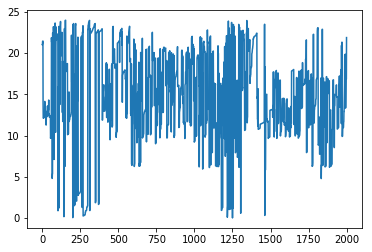

In [204]:
print(np.mean(stats))
plt.plot(np.array(stats))

In [210]:
len(coupon_visit_train) * 0.7 / 2000

991.6129999999998

In [43]:
coupon_area_train = pd.read_csv('data/coupon_area_train.csv')
coupon_area_train = coupon_area_train.apply(lambda row: row.apply(translate), axis=1)
coupon_area_train.head()

,SMALL_AREA_NAME,PREF_NAME,COUPON_ID_hash
0,Saitama,Saitama Prefecture,6b263844241eea98c5a97f1335ea82af
1,Chiba,Chiba Prefecture,cc031f250e8bad1e24060263b9fc0ddd
2,Chiba,Chiba Prefecture,ba5e9b7453ca52ff711635a5d2e8102d
3,Chiba,Chiba Prefecture,3e1ffbedca3569f9e8032d401e8cb4e6
4,Chiba,Chiba Prefecture,782934b6c815b4030ea204eef7d4a734


In [58]:
prefecture_locations = pd.read_csv('data/prefecture_locations.csv', index_col='PREF_NAME')
prefecture_locations = prefecture_locations.apply(lambda row: row.apply(translate), axis=1)
prefecture_locations.index = prefecture_locations.index.map(translate)
prefecture_locations.head()

,PREFECTUAL_OFFICE,LATITUDE,LONGITUDE
PREF_NAME,,,
Hokkaido,Sapporo,43.063968,141.347899
Aomori Prefecture,Aomori,40.824623,140.740593
Iwate Prefecture,Morioka,39.703531,141.152667
Miyagi Prefecture,Sendai,38.268839,140.872103
Akita,Akita,39.718600,140.102334


In [63]:
coupon_detail_train = pd.read_csv('data/coupon_detail_train.csv')
coupon_detail_train = coupon_detail_train.apply(lambda row: row.apply(translate), axis=1)
coupon_detail_train.head()

,ITEM_COUNT,I_DATE,SMALL_AREA_NAME,PURCHASEID_hash,USER_ID_hash,COUPON_ID_hash
0,1,2012-03-28 15:06:06,Hyogo,c820a8882374a4e472f0984a8825893f,d9dca3cb44bab12ba313eaa681f663eb,34c48f84026e08355dc3bd19b427f09a
1,1,2011-07-04 23:52:54,"Ginza Shinbashi, Tokyo, Ueno",1b4eb2435421ede98c8931c42e8220ec,560574a339f1b25e57b0221e486907ed,767673b7a777854a92b73b0934ddfae7
2,1,2011-07-16 00:52:49,"Ebisu, Meguro Shinagawa",36b5f9ba46c44b65587d0b16f2e4c77f,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
3,1,2011-07-16 00:54:53,"Ebisu, Meguro Shinagawa",2f30f46937cc9004774e576914b2aa1a,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2
4,1,2011-07-16 00:55:52,"Ebisu, Meguro Shinagawa",4d000c64a55ac573d0ae1a8f03677f50,560574a339f1b25e57b0221e486907ed,4f3b5b91d9831192557c056022fdc1f2


## Problem Definition